In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import warnings
from pyramid.arima import auto_arima

warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv('../raw data/ETH-USD.csv')

In [3]:
# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.resample('D').mean()
data = data.ffill()

In [4]:
# Check missing values
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-06,0.6747,3.0,0.6747,3.00,3.00,371.0
2015-08-07,3.0000,3.0,0.1500,1.20,1.20,1438.0
2015-08-08,1.2000,1.2,1.2000,1.20,1.20,0.0
2015-08-09,1.2000,1.2,1.2000,1.20,1.20,0.0
2015-08-10,1.2000,1.2,0.6504,0.99,0.99,7419.0


In [6]:
data.index

DatetimeIndex(['2015-08-06', '2015-08-07', '2015-08-08', '2015-08-09',
               '2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13',
               '2015-08-14', '2015-08-15',
               ...
               '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30',
               '2019-03-31', '2019-04-01'],
              dtype='datetime64[ns]', name='Date', length=1335, freq='D')

<table><tr><td bgcolor=orange><font size=3> SARIMA for "High"

In [7]:
y = data['High']

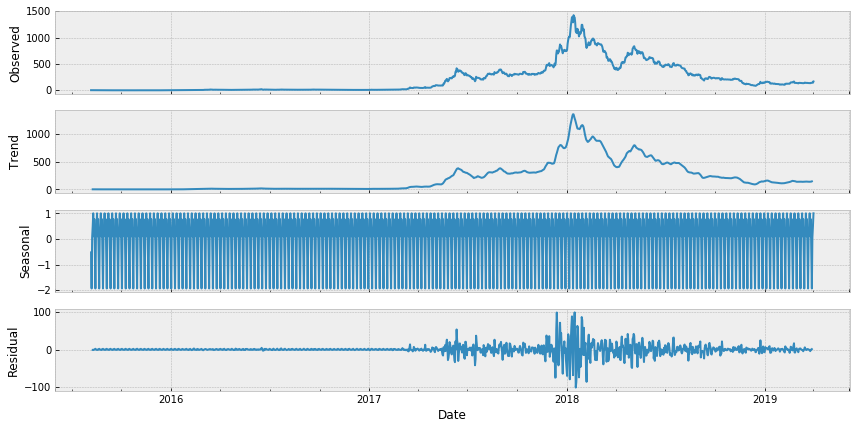

In [8]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [9]:
# y = y['2016':]

In [10]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

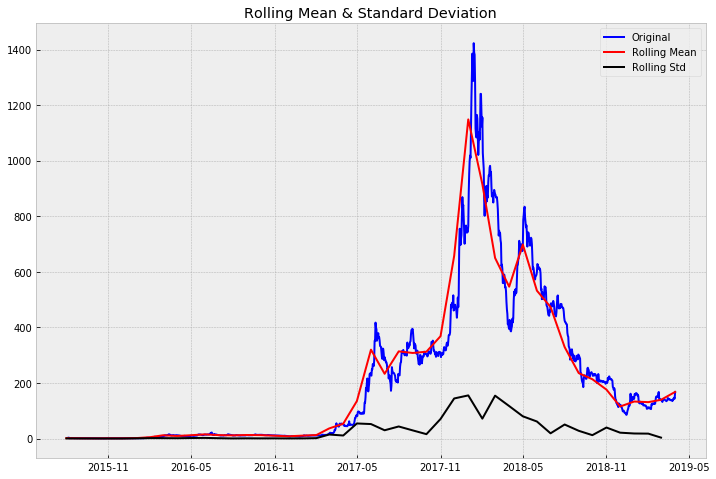

Results of Dickey-Fuller Test:
Test Statistic                   -2.003657
p-value                           0.284972
#Lags Used                       23.000000
Number of Observations Used    1311.000000
Critical Value (1%)              -3.435348
Critical Value (5%)              -2.863747
Critical Value (10%)             -2.567945
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1331.4745492114243  p-value=1.6346444444269615e-291
Largest Lag Included:1 Test Statistic=2654.663545049756  p-value=0.0
Largest Lag Included:2 Test Statistic=3969.2874124233185  p-value=0.0
Largest Lag Included:3 Test Statistic=5274.9338172416055  p-value=0.0
Largest Lag Included:4 Test Statistic=6571.436611795537  p-value=0.0


In [12]:
test_stationarity(y)

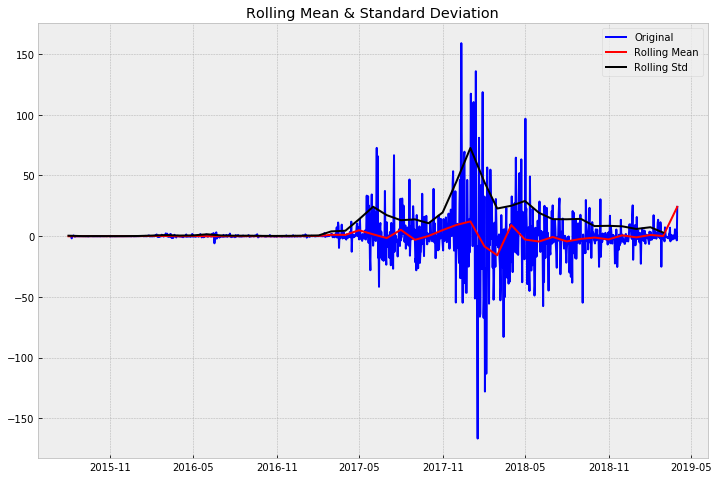

Results of Dickey-Fuller Test:
Test Statistic                -6.305783e+00
p-value                        3.326324e-08
#Lags Used                     2.200000e+01
Number of Observations Used    1.311000e+03
Critical Value (1%)           -3.435348e+00
Critical Value (5%)           -2.863747e+00
Critical Value (10%)          -2.567945e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=71.92906511796562  p-value=2.230738871127063e-17
Largest Lag Included:1 Test Statistic=72.75991244158784  p-value=1.586301596894972e-16
Largest Lag Included:2 Test Statistic=74.56464554000964  p-value=4.491702734669622e-16
Largest Lag Included:3 Test Statistic=74.89994711388438  p-value=2.092084309280858e-15
Largest Lag Included:4 Test Statistic=85.95455666188778  p-value=4.747829146382099e-17


In [13]:
test_stationarity(y.diff(1).dropna())

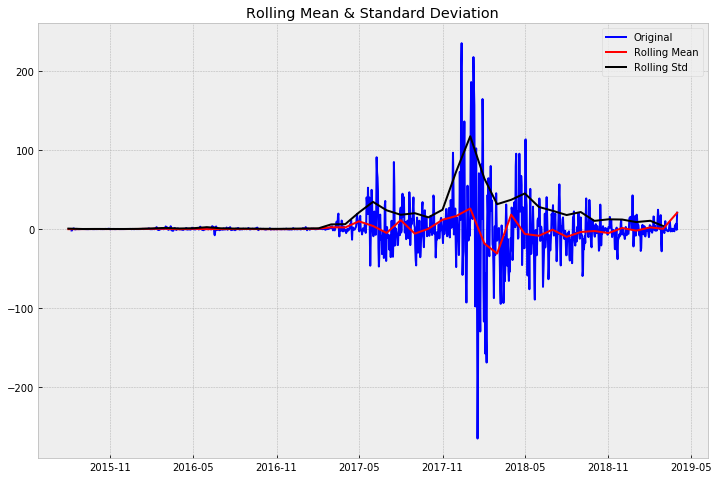

Results of Dickey-Fuller Test:
Test Statistic                -6.422283e+00
p-value                        1.779324e-08
#Lags Used                     2.100000e+01
Number of Observations Used    1.311000e+03
Critical Value (1%)           -3.435348e+00
Critical Value (5%)           -2.863747e+00
Critical Value (10%)          -2.567945e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=487.59288681778156  p-value=4.7596512387743745e-108
Largest Lag Included:1 Test Statistic=509.9657588724378  p-value=1.8295424094780243e-111
Largest Lag Included:2 Test Statistic=512.8235227170682  p-value=7.935154430458058e-111
Largest Lag Included:3 Test Statistic=518.4012665318451  p-value=7.012996400250715e-111
Largest Lag Included:4 Test Statistic=542.2064014150832  p-value=6.163712582690713e-115


In [14]:
test_stationarity(y.diff(2).dropna())

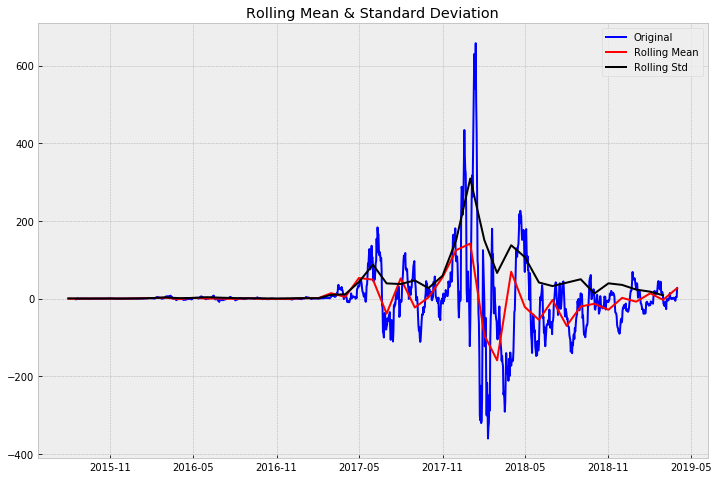

Results of Dickey-Fuller Test:
Test Statistic                -6.515681e+00
p-value                        1.072853e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.299000e+03
Critical Value (1%)           -3.435394e+00
Critical Value (5%)           -2.863768e+00
Critical Value (10%)          -2.567956e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1192.1589516505271  p-value=3.0859033583231514e-261
Largest Lag Included:1 Test Statistic=2199.8171172188136  p-value=0.0
Largest Lag Included:2 Test Statistic=3025.3781595781866  p-value=0.0
Largest Lag Included:3 Test Statistic=3668.452061498789  p-value=0.0
Largest Lag Included:4 Test Statistic=4148.544669959518  p-value=0.0


In [15]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

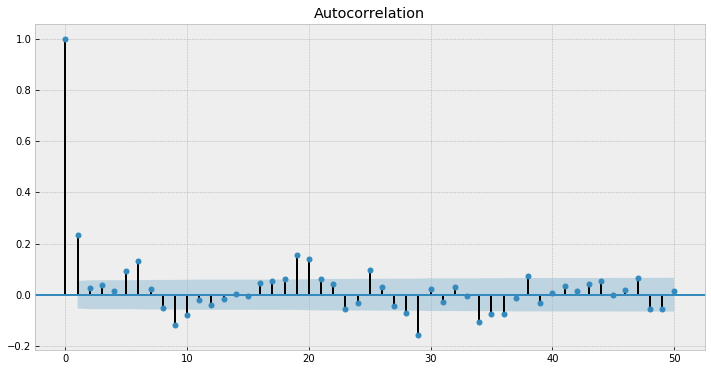

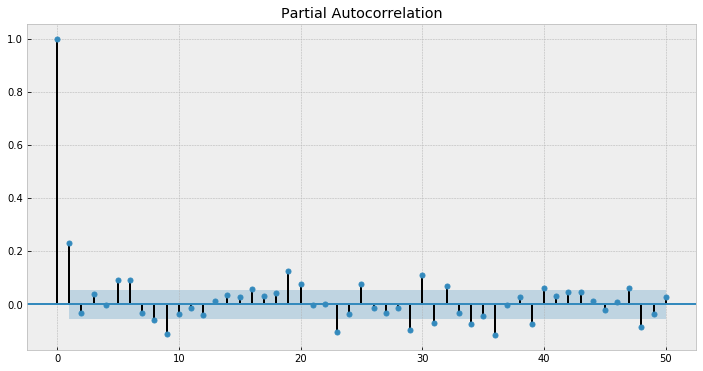

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0469      0.051      0.921      0.357      -0.053       0.147
ma.L1          0.1947      0.050      3.895      0.000       0.097       0.293
sigma2       320.0323      3.991     80.195      0.000     312.211     327.854
11468.200448494921


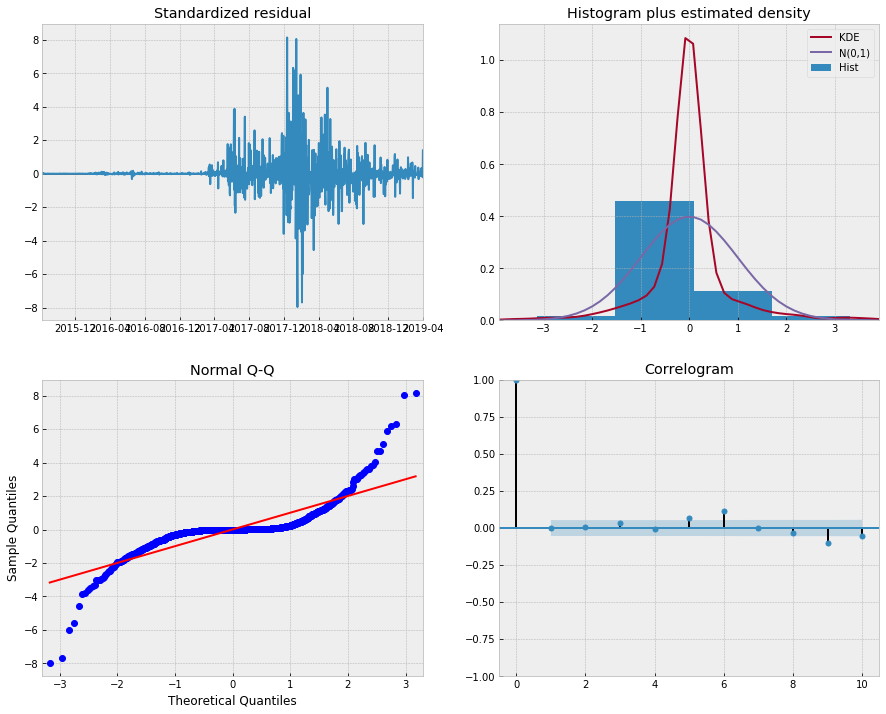

In [18]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

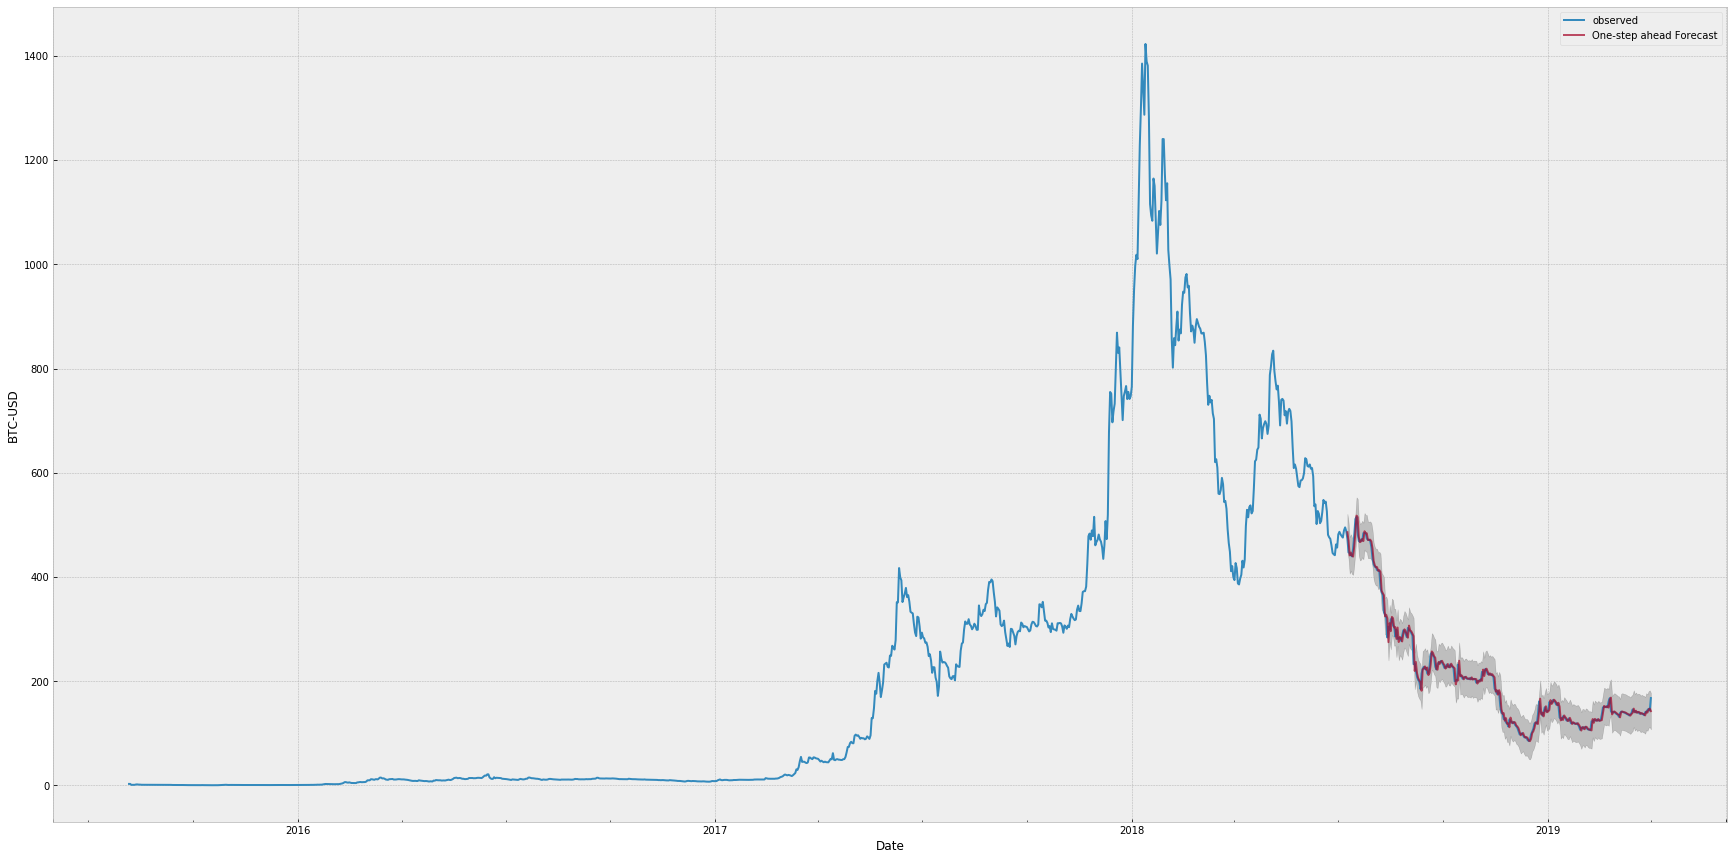

In [19]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 102.7862
The R2 of our model is 0.9909


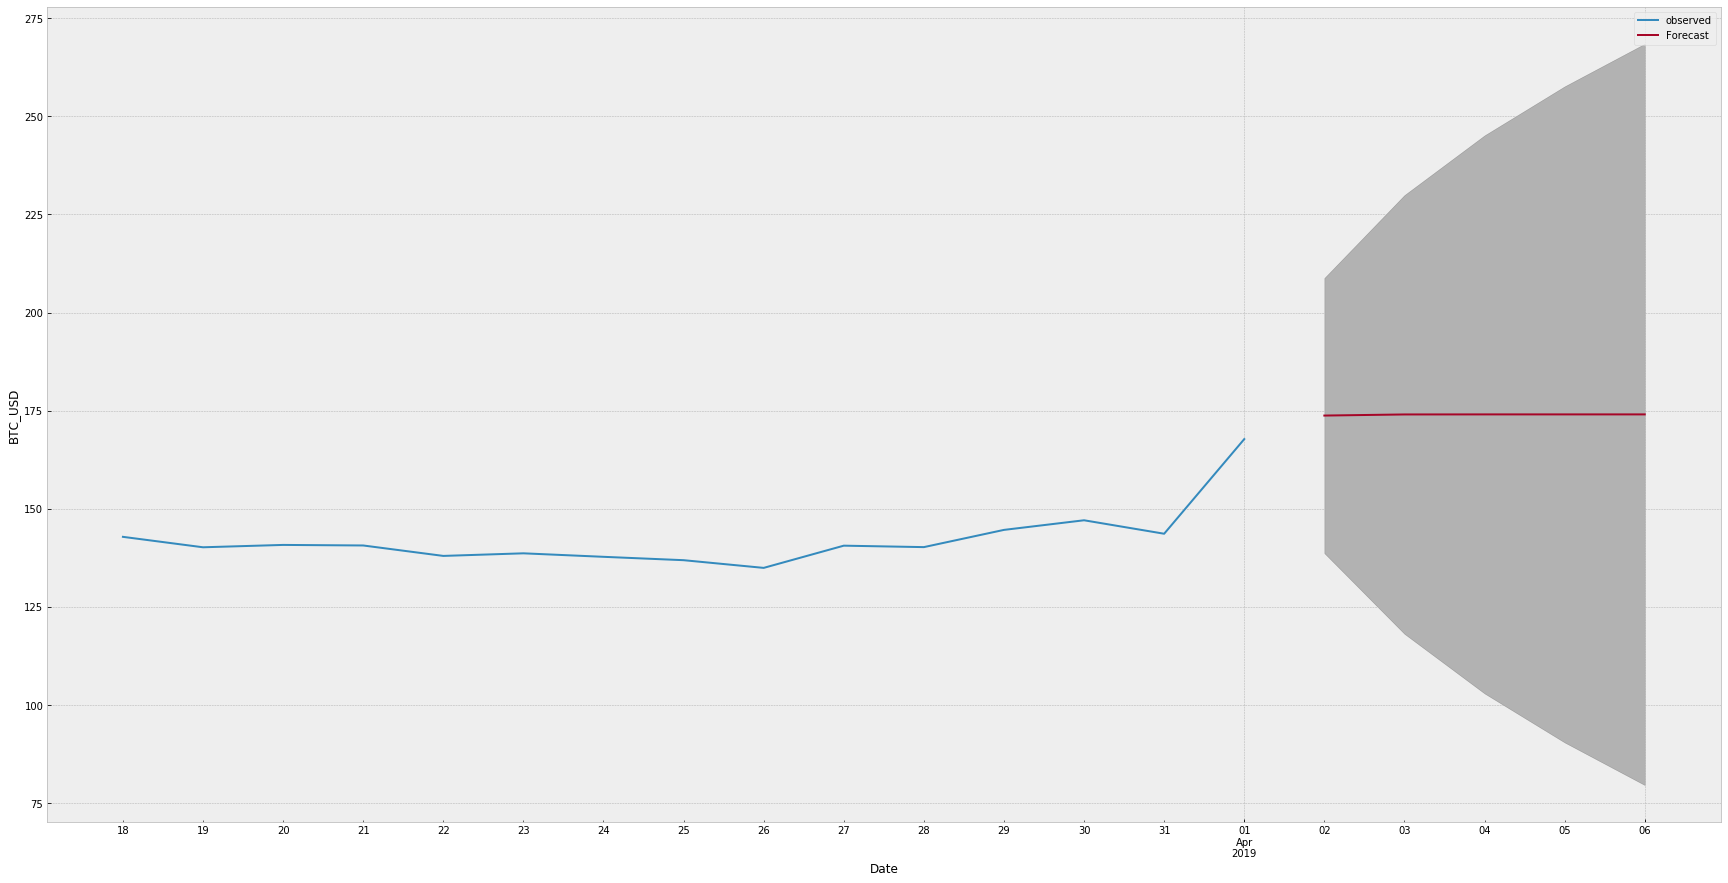

In [21]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [22]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [23]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:11547.524829236372
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:11466.312878112007
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:11460.631708014218
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:11453.283158830756
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:11447.45000934698
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:11440.140793501841
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:11408.791160260535
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:11398.169186863332
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:11392.135255295856
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:11380.426216262902
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:11370.452997571174
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:11364.864787596282
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:11357.88983580982
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:11350.214913524671
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:11341.83527159461
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:11326.277722241455
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:11320.707886665314
ARIMA(0, 1, 17)x(0, 0, 0, 12)12 - AIC:11314.

ARIMA(6, 1, 20)x(0, 0, 0, 12)12 - AIC:11242.539527271394
ARIMA(7, 1, 0)x(0, 0, 0, 12)12 - AIC:11414.22572550861
ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:11405.793632478142
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:11380.622882734886
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:11406.37025260367
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:11415.350276858968
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:11380.36008929453
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:11373.598782481431
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:11363.724773186455
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:11345.548229266384
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:11346.794796695256
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:11362.327444900391
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:11340.149987460532
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:11326.955875959313
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:11323.261503821537
ARIMA(7, 1, 14)x(0, 0, 0, 12)12 - AIC:11320.399242751617
ARIMA(7, 1, 15)x(0, 0, 0, 12)12 - AIC:11302.186627481802
ARIMA(7, 1, 16)x(0, 0, 0, 12)12 - AIC:11290.

ARIMA(13, 1, 18)x(0, 0, 0, 12)12 - AIC:11257.962592668373
ARIMA(13, 1, 19)x(0, 0, 0, 12)12 - AIC:11252.574223166534
ARIMA(13, 1, 20)x(0, 0, 0, 12)12 - AIC:11233.8990270666
ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:11348.325064361412
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:11338.987394834938
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:11333.669496612682
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:11334.206175527177
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:11336.298219609547
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:11336.69132486937
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:11387.170392816399
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:11433.47930930143
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:11328.919150539095
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:11362.587284390616
ARIMA(14, 1, 10)x(0, 0, 0, 12)12 - AIC:11342.29694052122
ARIMA(14, 1, 11)x(0, 0, 0, 12)12 - AIC:11344.327747779109
ARIMA(14, 1, 12)x(0, 0, 0, 12)12 - AIC:11329.611313323818
ARIMA(14, 1, 13)x(0, 0, 0, 12)12 - AIC:11320.604942031763
ARIMA(14, 1, 14)x(0, 0, 0, 12

ARIMA(20, 1, 14)x(0, 0, 0, 12)12 - AIC:11271.723719060425
ARIMA(20, 1, 15)x(0, 0, 0, 12)12 - AIC:11276.802039034228
ARIMA(20, 1, 16)x(0, 0, 0, 12)12 - AIC:11259.547787884107
ARIMA(20, 1, 17)x(0, 0, 0, 12)12 - AIC:11259.815080378592
ARIMA(20, 1, 18)x(0, 0, 0, 12)12 - AIC:11234.030510057719
ARIMA(20, 1, 19)x(0, 0, 0, 12)12 - AIC:11236.024307299313
ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:11227.35733321286
Finished...


### Min_AIC_list ### 
param               (19, 1, 20)
param_seasonal    (0, 0, 0, 12)
AIC                     11227.1
Name: 419, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1120      0.362      0.309      0.757      -0.597       0.821
ar.L2          0.2794      0.271      1.030      0.303      -0.252       0.811
ar.L3          0.0962      0.335      0.287      0.774      -0.561       0.753
ar.L4         -0.3263      0.292     -1.117      0.264      -0.898       0.246
ar.L5          0.3080      0.379      0.812      0.417      -0.436       1.052
ar.L6          0.3733      0.357      1.046      0.296      -0.326       1.073
ar.L7         -0.3175      0.457     -0.695      0.487      -1.214       0.578
ar.L8         -0.4145      0.431     -0.962      0.336      -1.259       0.430
ar.L9         -0.1409      0.519     -0.272      0.786      -1.158 

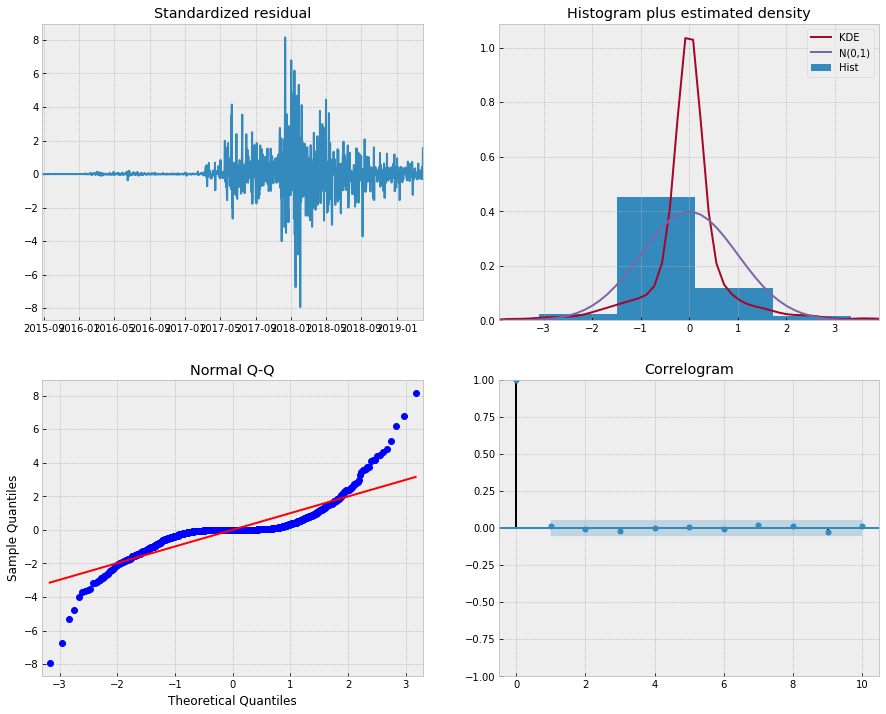

In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

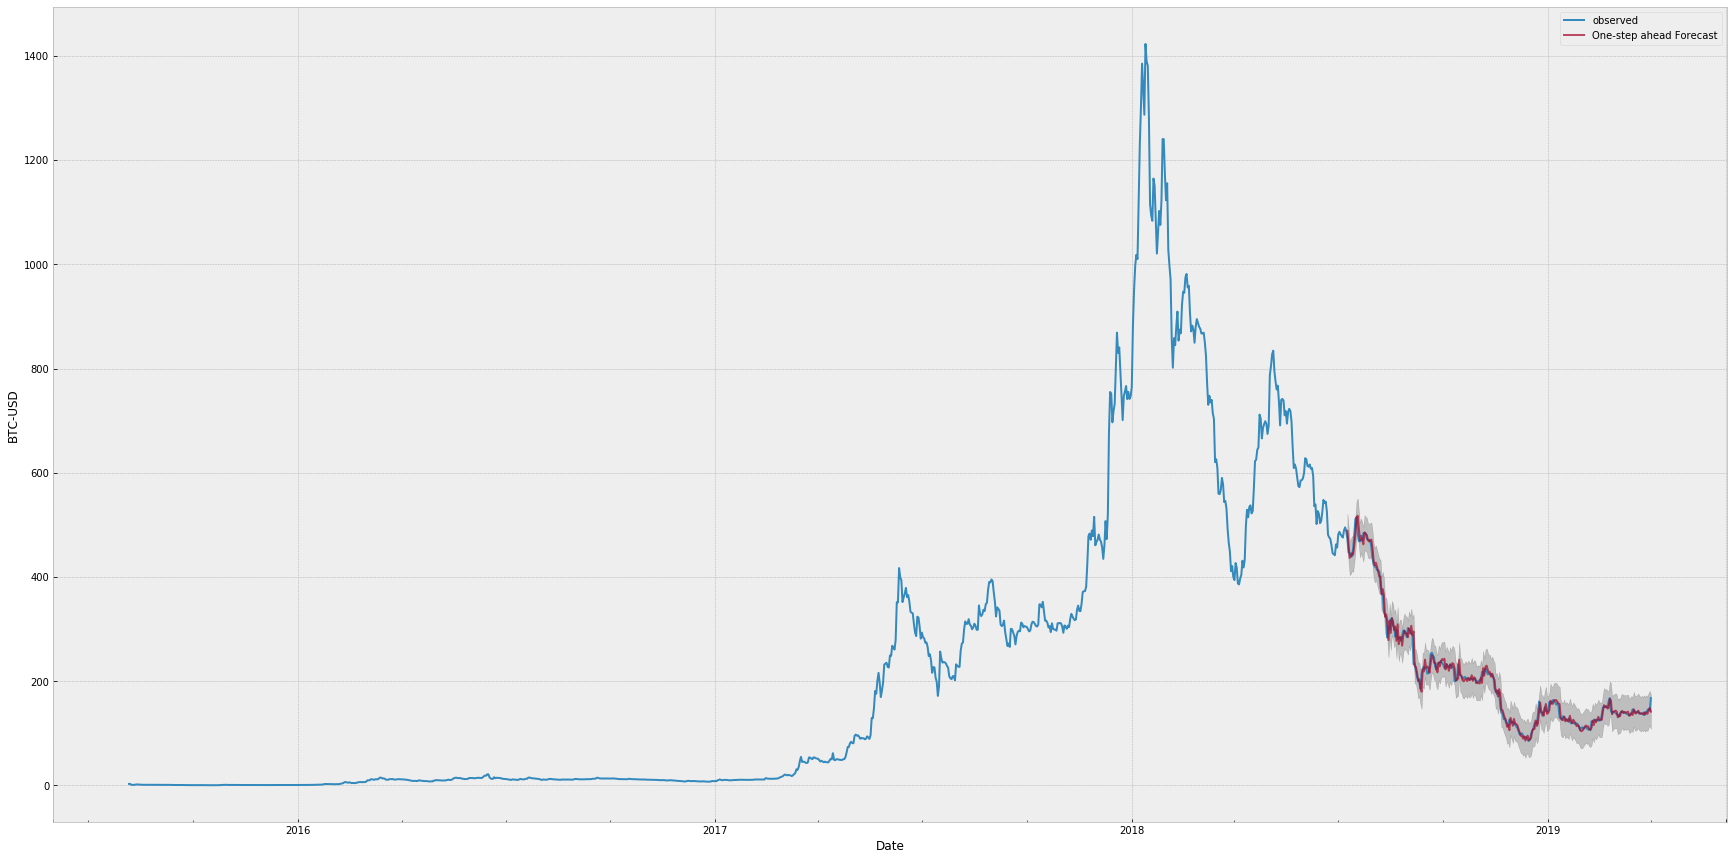

In [25]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [26]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 115.9991
The R2 of our model is 0.9898


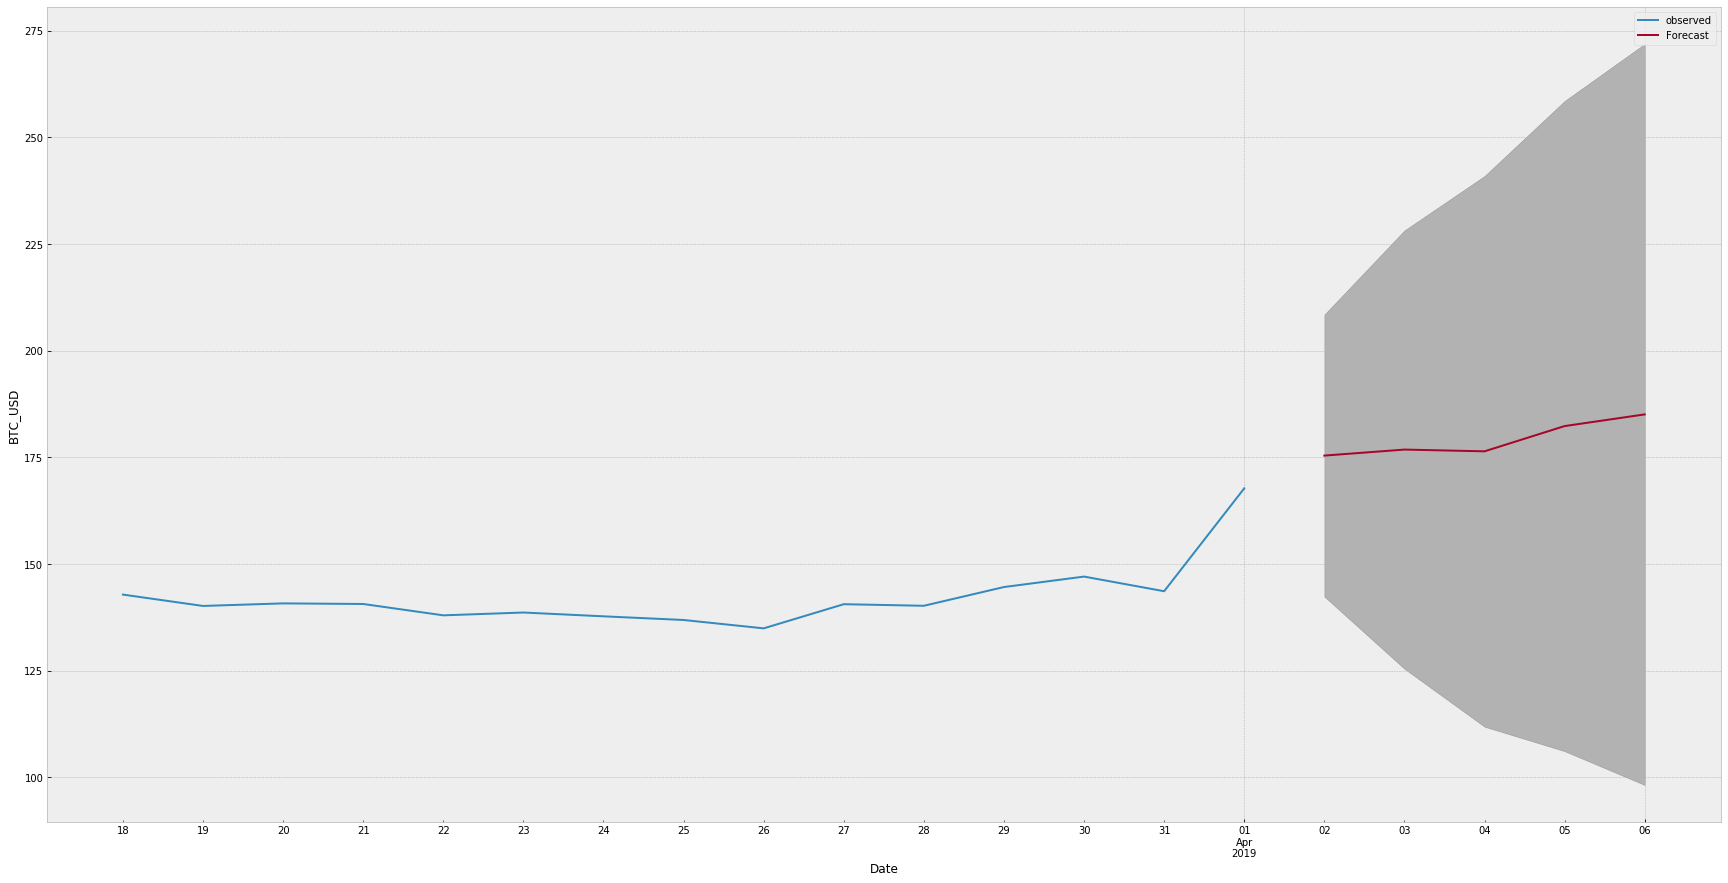

In [27]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model fails to outperform the baseline model.

<table><tr><td bgcolor=orange><font size=3> SARIMA for "Low"

In [28]:
y = data['Low']

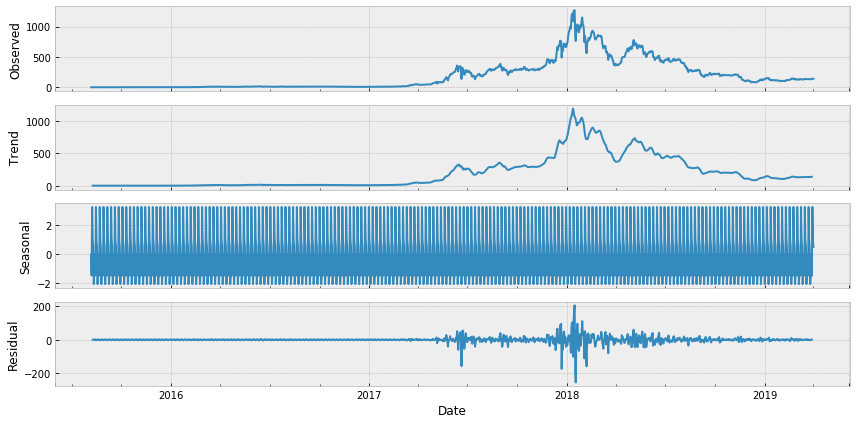

In [29]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [30]:
# y = y['2017':]

In [31]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [32]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

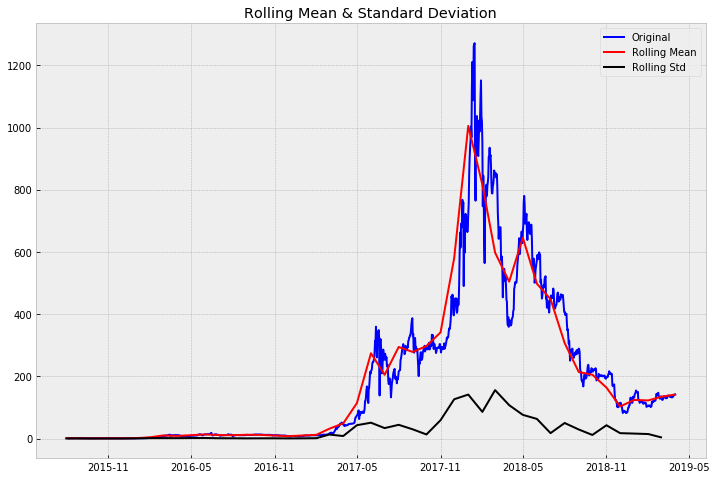

Results of Dickey-Fuller Test:
Test Statistic                   -2.009980
p-value                           0.282214
#Lags Used                       23.000000
Number of Observations Used    1311.000000
Critical Value (1%)              -3.435348
Critical Value (5%)              -2.863747
Critical Value (10%)             -2.567945
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1322.5489554404337  p-value=1.4224916549269556e-289
Largest Lag Included:1 Test Statistic=2631.4322732298547  p-value=0.0
Largest Lag Included:2 Test Statistic=3929.6175415532966  p-value=0.0
Largest Lag Included:3 Test Statistic=5219.913588655259  p-value=0.0
Largest Lag Included:4 Test Statistic=6502.472062593257  p-value=0.0


In [33]:
test_stationarity(y)

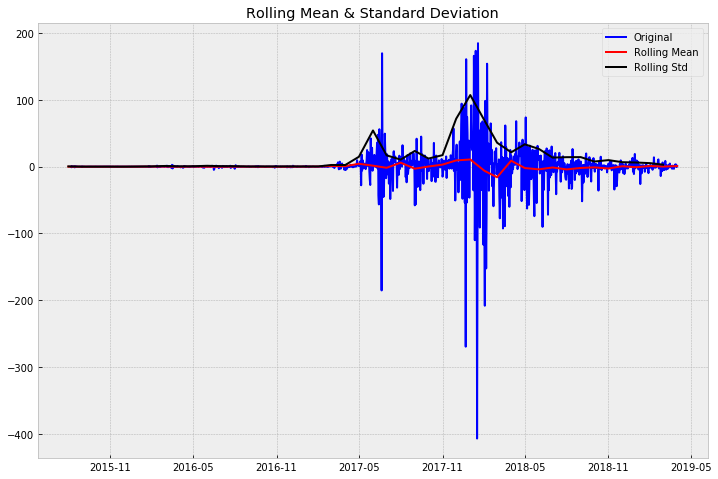

Results of Dickey-Fuller Test:
Test Statistic                -6.852383e+00
p-value                        1.681416e-09
#Lags Used                     2.300000e+01
Number of Observations Used    1.310000e+03
Critical Value (1%)           -3.435352e+00
Critical Value (5%)           -2.863749e+00
Critical Value (10%)          -2.567946e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=0.8079656832459454  p-value=0.36872238135845314
Largest Lag Included:1 Test Statistic=13.943679913914046  p-value=0.0009379255745297577
Largest Lag Included:2 Test Statistic=26.075002545984013  p-value=9.198689456687338e-06
Largest Lag Included:3 Test Statistic=26.104915107065825  p-value=3.0139912791818944e-05
Largest Lag Included:4 Test Statistic=37.58007108182148  p-value=4.581778446662367e-07


In [34]:
test_stationarity(y.diff(1).dropna())

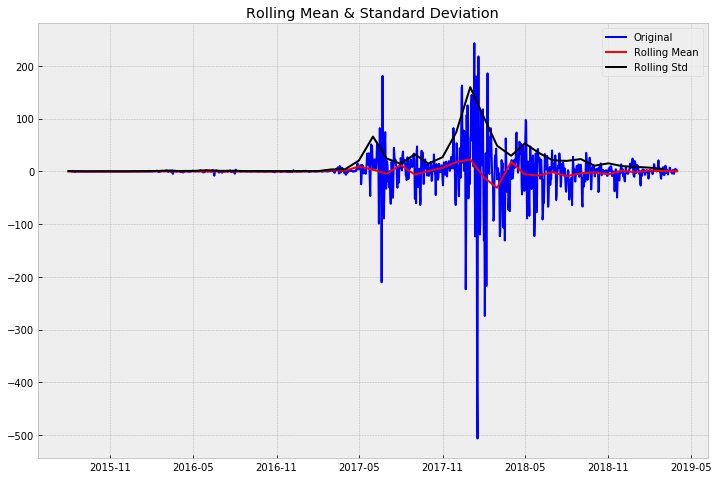

Results of Dickey-Fuller Test:
Test Statistic                -6.204595e+00
p-value                        5.698212e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.309000e+03
Critical Value (1%)           -3.435355e+00
Critical Value (5%)           -2.863751e+00
Critical Value (10%)          -2.567947e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=254.67890964678386  p-value=2.4798886060765195e-57
Largest Lag Included:1 Test Statistic=290.19005950752336  p-value=9.68343019840353e-64
Largest Lag Included:2 Test Statistic=320.615658236918  p-value=3.4314297870495383e-69
Largest Lag Included:3 Test Statistic=320.66744582298276  p-value=3.7642116299492465e-68
Largest Lag Included:4 Test Statistic=350.83517507757574  p-value=1.1568886084514757e-73


In [35]:
test_stationarity(y.diff(2).dropna())

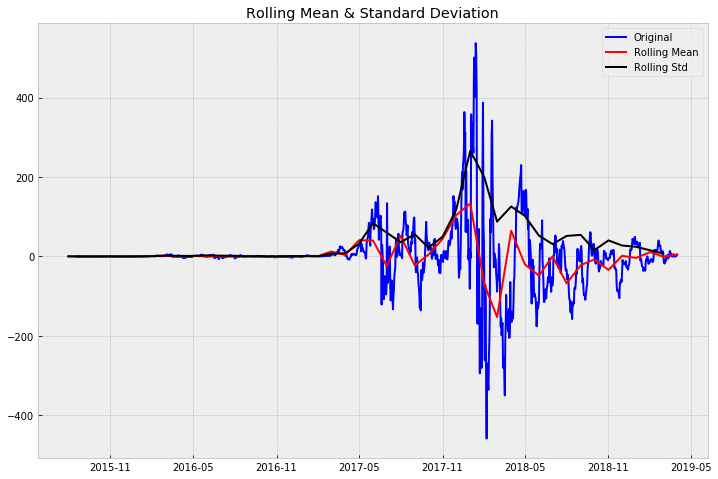

Results of Dickey-Fuller Test:
Test Statistic                -8.284818e+00
p-value                        4.419780e-13
#Lags Used                     2.300000e+01
Number of Observations Used    1.299000e+03
Critical Value (1%)           -3.435394e+00
Critical Value (5%)           -2.863768e+00
Critical Value (10%)          -2.567956e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1017.9318216186615  p-value=2.272838479194054e-223
Largest Lag Included:1 Test Statistic=1767.005205824829  p-value=0.0
Largest Lag Included:2 Test Statistic=2344.8373663637167  p-value=0.0
Largest Lag Included:3 Test Statistic=2810.1321052529183  p-value=0.0
Largest Lag Included:4 Test Statistic=3169.3378685608077  p-value=0.0


In [36]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

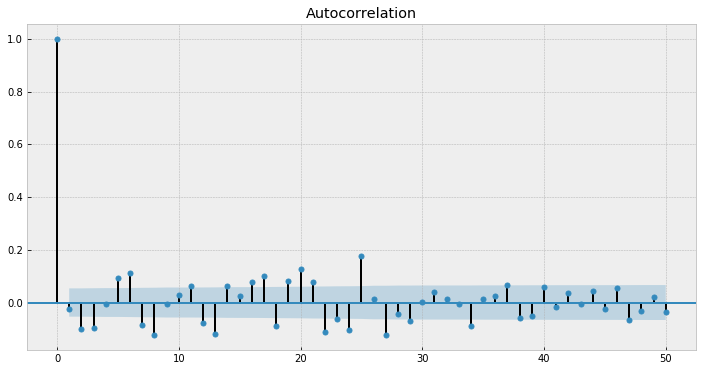

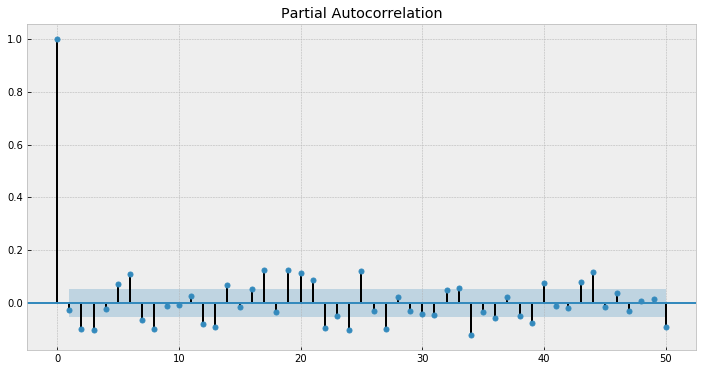

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       687.4011      4.597    149.536      0.000     678.391     696.411
12493.264623120536


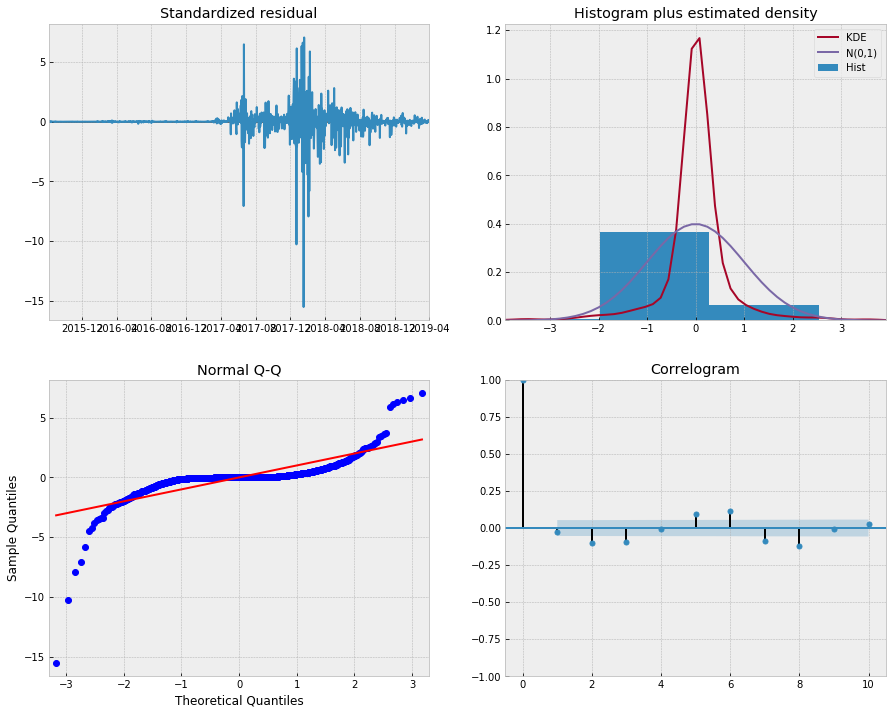

In [38]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

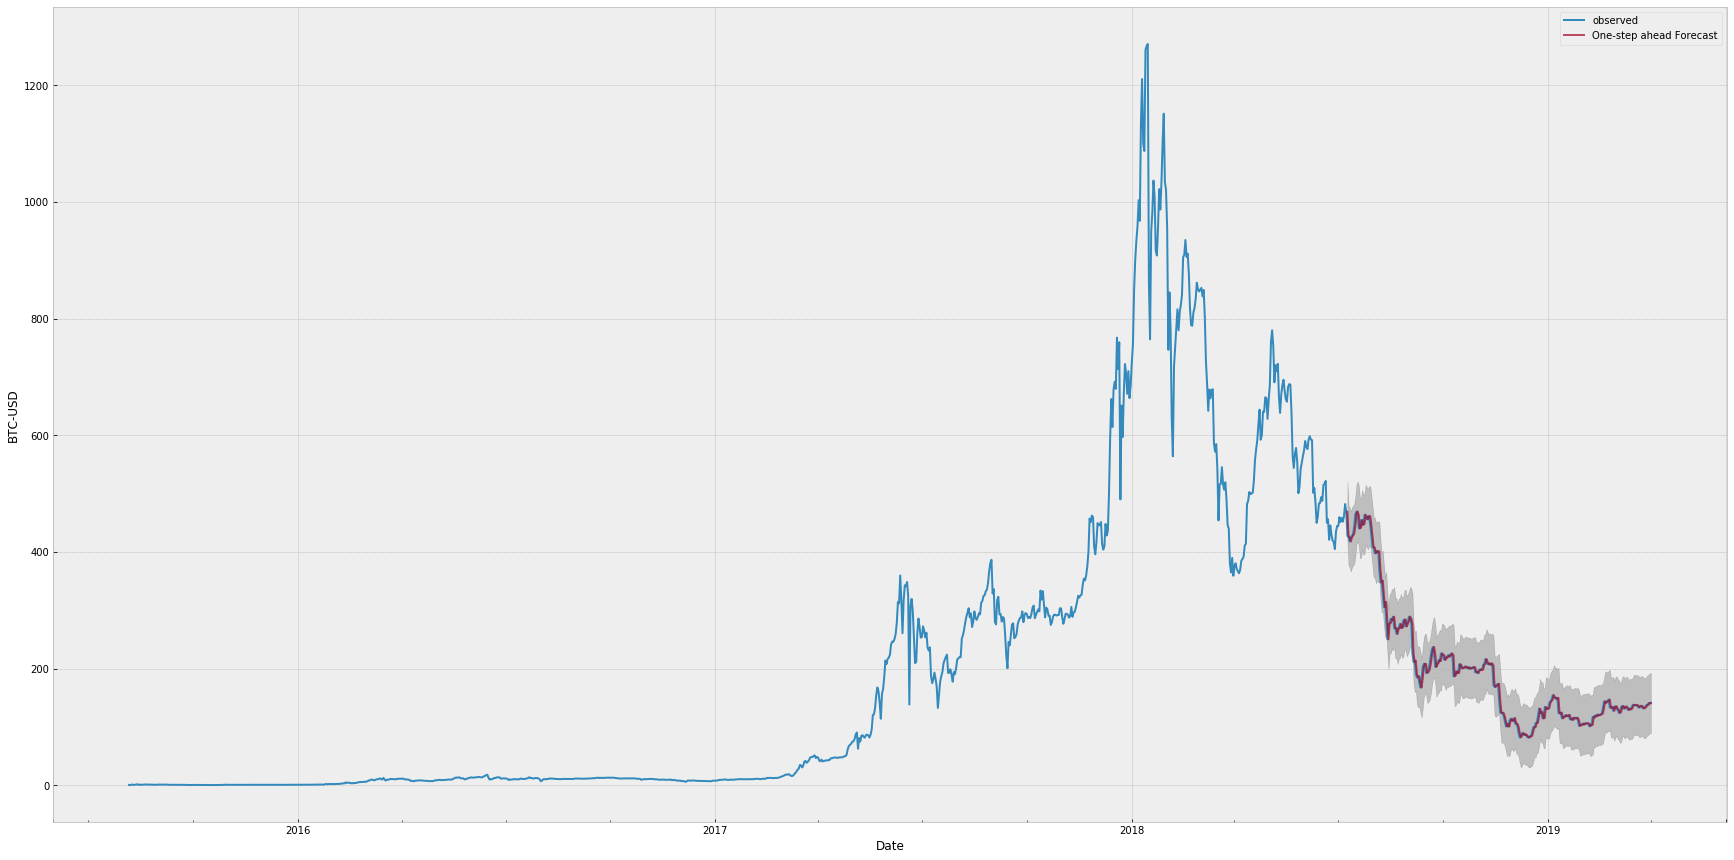

In [39]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [40]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 95.8285
The R2 of our model is 0.9906


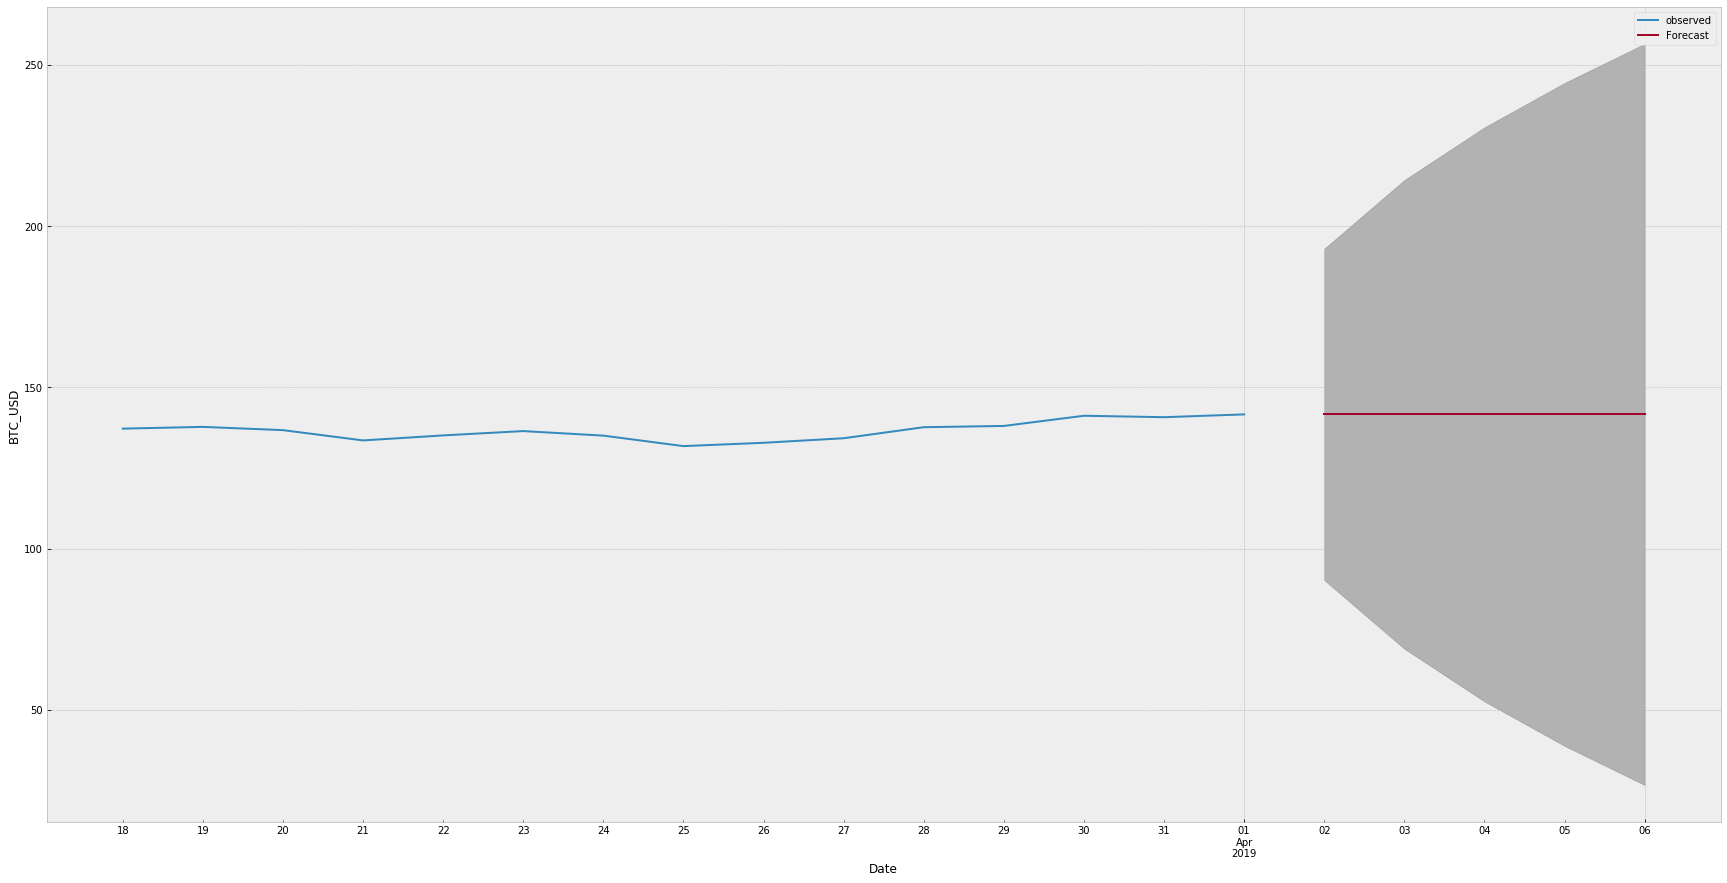

In [41]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [42]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [43]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:12493.264623120536
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:12485.881183900055
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:12464.62589024707
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:12451.051124509562
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:12444.64760391122
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:12431.642056798617
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:12413.661989527809
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:12402.462001643114
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:12378.47136042796
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:12371.521879707645
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:12365.190730195129
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:12358.67119372766
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:12342.252953111132
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:12329.241370125215
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:12322.01410252292
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:12313.374241492942
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:12298.217568985812
ARIMA(0, 1, 17)x(0, 0, 0, 12)12 - AIC:12227.62

ARIMA(6, 1, 20)x(0, 0, 0, 12)12 - AIC:12154.963909273161
ARIMA(7, 1, 0)x(0, 0, 0, 12)12 - AIC:12400.223529090264
ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:12393.647701308462
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:12379.659902219384
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:12380.478234316684
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:12382.32016566
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:12368.573250024725
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:12331.687699324784
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:12343.691397645725
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:12332.394871569055
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:12293.672253666433
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:12279.955646819499
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:12271.057410649362
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:12265.05135491391
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:12259.819478744215
ARIMA(7, 1, 14)x(0, 0, 0, 12)12 - AIC:12255.052230388244
ARIMA(7, 1, 15)x(0, 0, 0, 12)12 - AIC:12247.369080012506
ARIMA(7, 1, 16)x(0, 0, 0, 12)12 - AIC:12222.02

ARIMA(13, 1, 18)x(0, 0, 0, 12)12 - AIC:12160.901911448906
ARIMA(13, 1, 19)x(0, 0, 0, 12)12 - AIC:12160.071689070352
ARIMA(13, 1, 20)x(0, 0, 0, 12)12 - AIC:12129.86128477706
ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:12316.746542735378
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:12318.344243281703
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:12309.229098730937
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:12308.688288135778
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:12272.3999441691
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:12333.08465793127
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:12311.474140606726
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:12331.94902573806
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:12287.527806274404
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:12265.273925917169
ARIMA(14, 1, 10)x(0, 0, 0, 12)12 - AIC:12287.702109811242
ARIMA(14, 1, 11)x(0, 0, 0, 12)12 - AIC:12281.7434869899
ARIMA(14, 1, 12)x(0, 0, 0, 12)12 - AIC:12262.616133909238
ARIMA(14, 1, 13)x(0, 0, 0, 12)12 - AIC:12240.930288711294
ARIMA(14, 1, 14)x(0, 0, 0, 12)1

ARIMA(20, 1, 15)x(0, 0, 0, 12)12 - AIC:12176.587399769902
ARIMA(20, 1, 16)x(0, 0, 0, 12)12 - AIC:12169.071326152021
ARIMA(20, 1, 17)x(0, 0, 0, 12)12 - AIC:12153.815715878538
ARIMA(20, 1, 18)x(0, 0, 0, 12)12 - AIC:12143.431800226917
ARIMA(20, 1, 19)x(0, 0, 0, 12)12 - AIC:12150.828976853389
ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:12118.27043250162
Finished...


### Min_AIC_list ### 
param               (20, 1, 20)
param_seasonal    (0, 0, 0, 12)
AIC                     12118.3
Name: 440, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3332      0.046     -7.287      0.000      -0.423      -0.244
ar.L2         -0.0669      0.048     -1.408      0.159      -0.160       0.026
ar.L3         -0.7162      0.050    -14.353      0.000      -0.814      -0.618
ar.L4         -0.1537      0.064     -2.403      0.016      -0.279      -0.028
ar.L5          0.1554      0.051      3.038      0.002       0.055       0.256
ar.L6          0.0778      0.060      1.291      0.197      -0.040       0.196
ar.L7         -0.2283      0.064     -3.541      0.000      -0.355      -0.102
ar.L8         -0.0346      0.047     -0.744      0.457      -0.126       0.057
ar.L9          0.0199      0.053      0.376      0.707      -0.084 

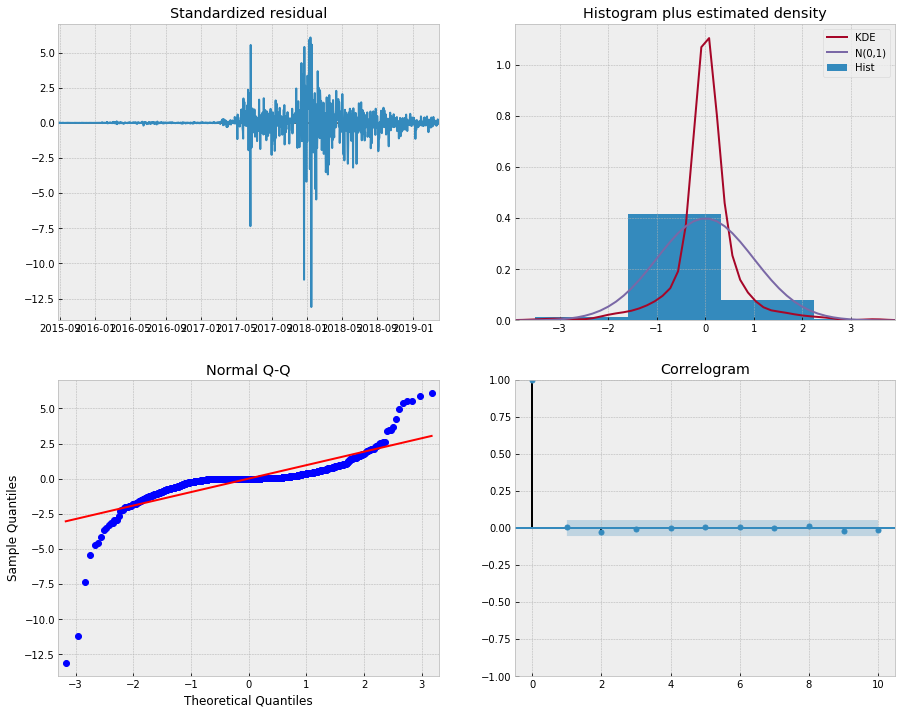

In [44]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

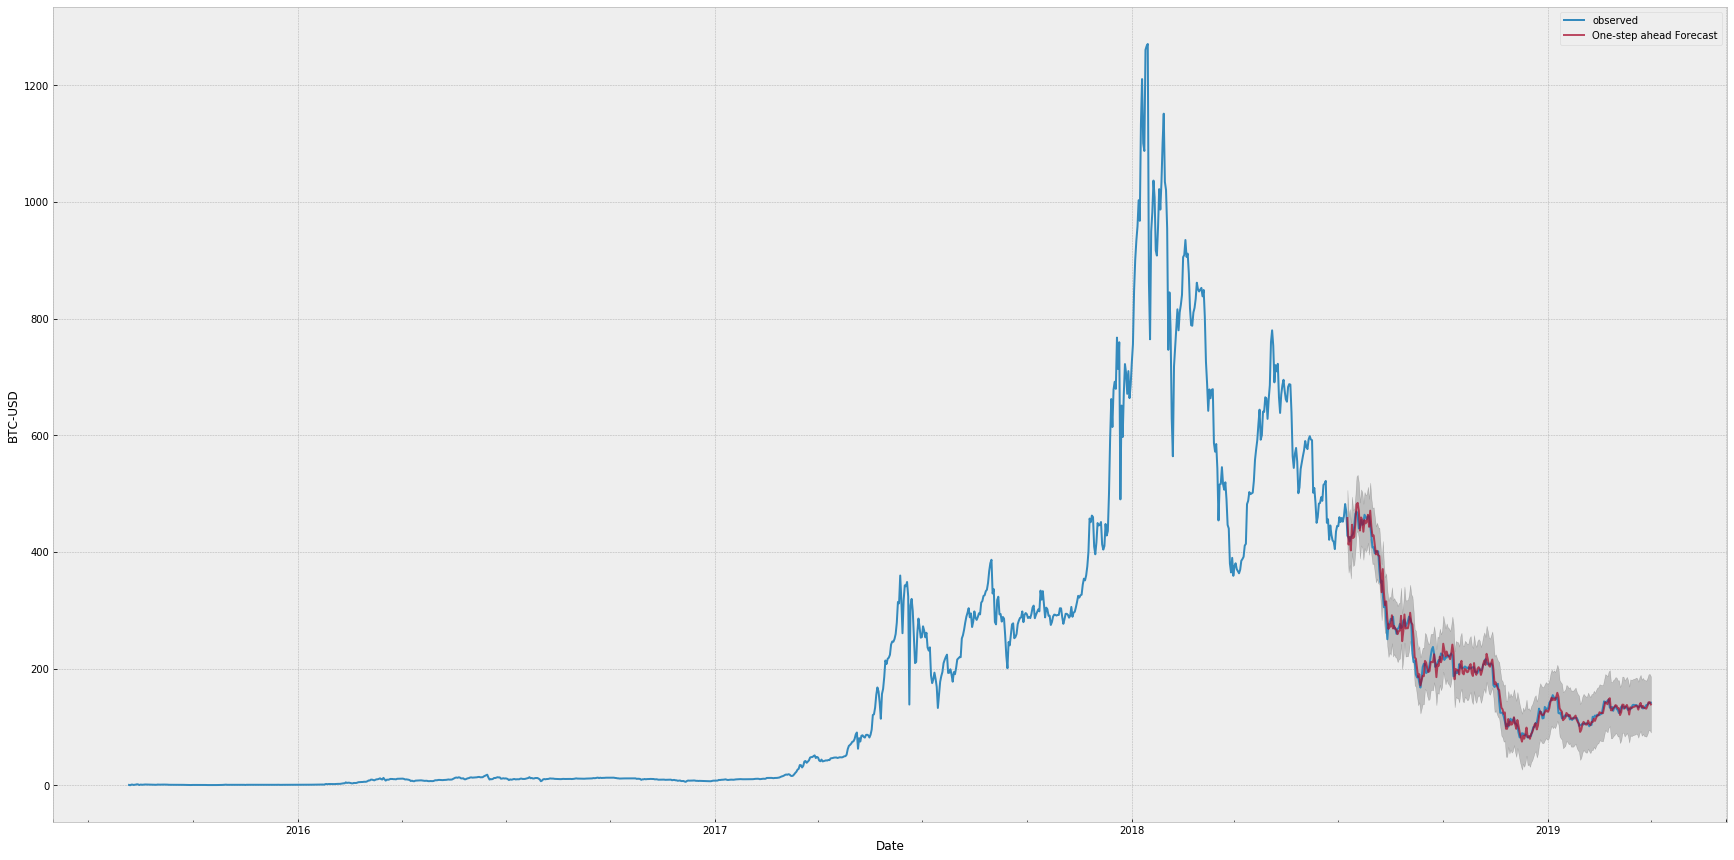

In [45]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [46]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 140.5132
The R2 of our model is 0.9862


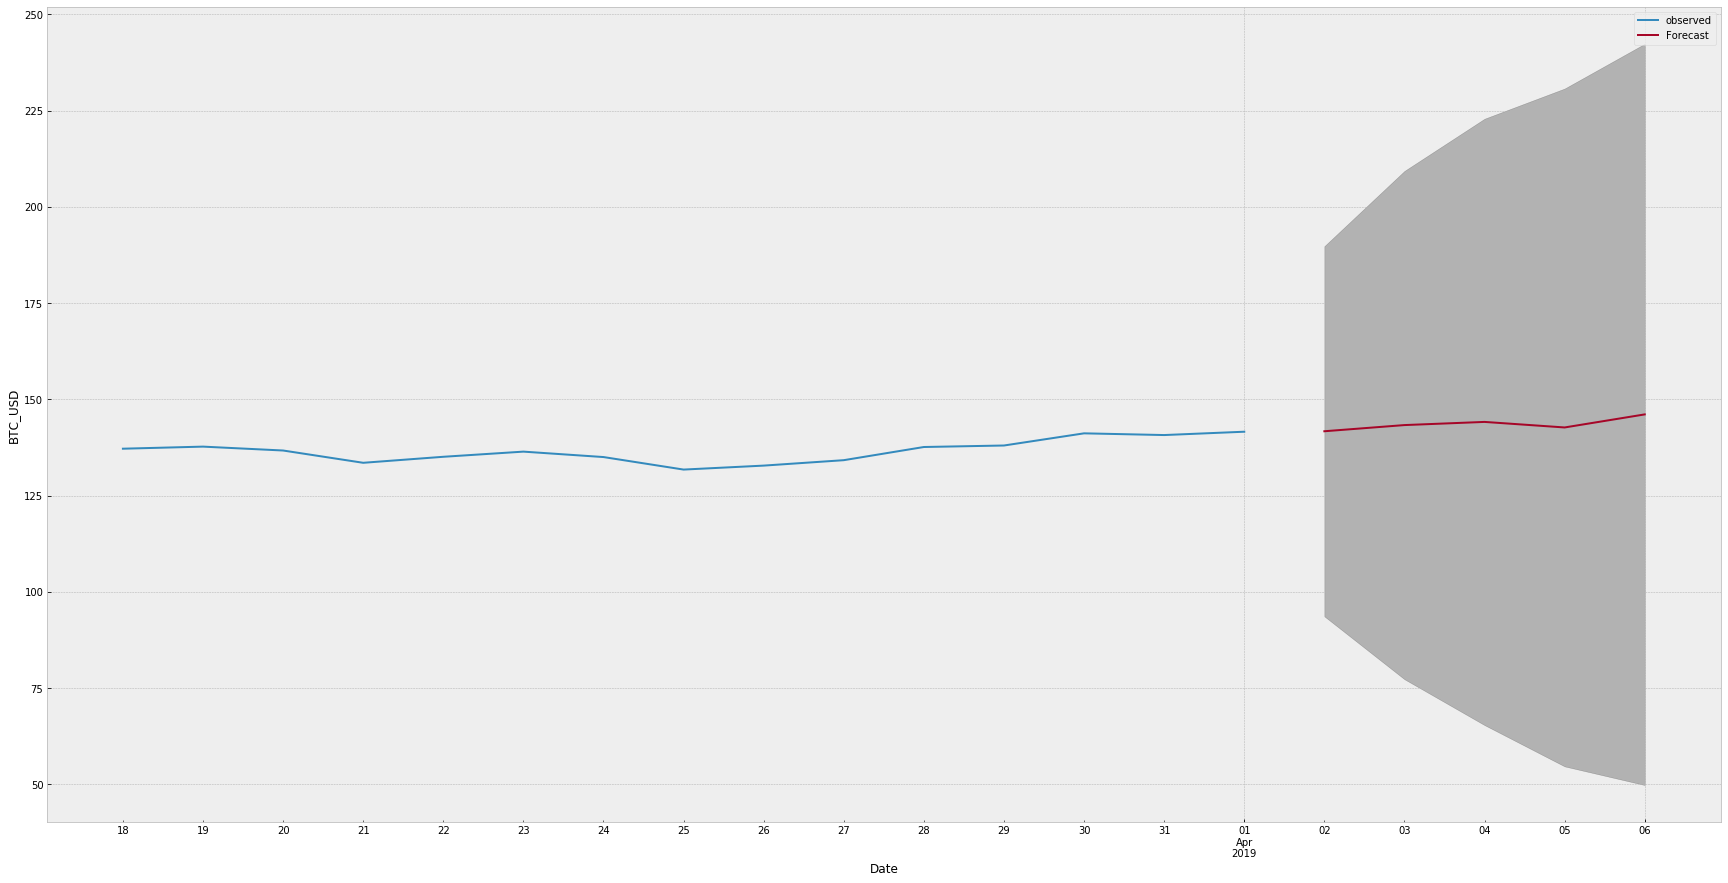

In [47]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model fails to outperform the baseline model.